In [4]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [5]:
df = pd.read_csv("data/product_reviews.csv")
print("Dataset loaded ✅")
print(df.head())

Dataset loaded ✅
                                         review_body  Sentiment
0  Arrived broken. Manufacturer defect. Two of th...          0
1  the cabinet dot were all detached from backing...          0
2  I received my first order of this product and ...          0
3  This product is a piece of shit. Do not buy. D...          0
4  went through 3 in one day doesn't fit correct ...          0


In [7]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['review_body'] = df['review_body'].apply(clean_text)
print("Text cleaning done ✅")

Text cleaning done ✅


In [10]:
X = df['review_body']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train-test split done ✅")

Train-test split done ✅


In [11]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=7000, ngram_range=(1,2), min_df=5)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
print("TF-IDF vectorization done ✅")


TF-IDF vectorization done ✅


In [12]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
print("Model training done ✅")

Model training done ✅


In [13]:
y_pred = model.predict(X_test_tfidf)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.48285

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.63      0.59      7984
           1       0.39      0.35      0.37      8009
           2       0.37      0.35      0.36      7932
           3       0.45      0.40      0.42      7999
           4       0.60      0.68      0.64      8076

    accuracy                           0.48     40000
   macro avg       0.47      0.48      0.48     40000
weighted avg       0.47      0.48      0.48     40000



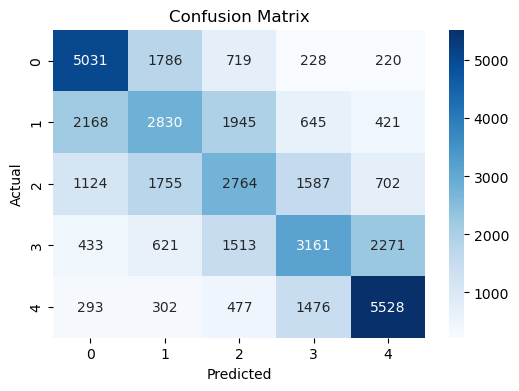

In [14]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [15]:
joblib.dump(model, "sentiment_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
print("Model and vectorizer saved successfully ✅")

Model and vectorizer saved successfully ✅


In [ ]:
# --- Imports ---
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# --- Create Pipeline ---
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=7000, ngram_range=(1,2), min_df=5)),
    ('clf', LogisticRegression(max_iter=500))
])

# --- Define Hyperparameters to Tune ---
param_grid = {
    'clf__C': [0.1, 1, 10],          # regularization strength
    'clf__solver': ['lbfgs'],        # solver for logistic regression
}

# --- Grid Search ---
grid = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

# --- Best Model ---
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# --- Predict & Evaluate ---
y_pred = best_model.predict(X_test)
print("Improved Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=best_model.classes_, yticklabels=best_model.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# --- Save Improved Model ---
joblib.dump(best_model, "improved_sentiment_model.pkl")
print("Improved model saved successfully ✅")


Fitting 3 folds for each of 3 candidates, totalling 9 fits


In [18]:
y_pred = best_model.predict(X_test)
print("Improved Model Accuracy:", accuracy_score(y_test, y_pred))


Improved Model Accuracy: 0.493675
